In [1]:
using PyPlot
using DataFrames

In [2]:
opath = pwd()
run="Sim_Watts_10k_20170210_211601"
wpath="runs/$run"
try cp("3D_Plotter.ipynb","$wpath/3D_Plotter.ipynb") catch end
cd(wpath)

In [3]:
mat_watts = readdlm("out_watts")
Ndata_watts = DataFrame(S_Density = mat_watts[:,1],R_Density = mat_watts[:,2] ,Nwin_Proportion = [mat_watts[i,3]/mat_watts[i,4] for i = 1:size(mat_watts,1)], ClustC = mat_watts[:,7])

,S_Density,R_Density,Nwin_Proportion,ClustC
1,7.028704489211199e8,7.172518587715912e8,1.5,0.12389380530973451
2,6.881024165031149e8,6.730480345732572e8,2.5714285714285716,0.20307692307692307
3,7.062494644963465e8,6.962401301248386e8,1.0833333333333333,0.2897196261682243
4,7.003758237439681e8,7.07358397983602e8,1.5,0.24074074074074073
5,7.023822089276001e8,7.20556619269825e8,1.0833333333333333,0.26498422712933756
6,7.029976702356386e8,6.99826458815305e8,1.2727272727272727,0.12923076923076923
7,6.905546999245414e8,6.6917756245489e8,1.7777777777777777,0.2392638036809816
8,7.097448791453847e8,7.232586976487118e8,1.2727272727272727,0.16913946587537093
9,7.050376939789985e8,7.166498181475742e8,1.173913043478261,0.18292682926829268
10,6.960251334025921e8,6.987386165867935e8,1.173913043478261,0.19626168224299065


In [ ]:
Nwin_Prop = Ndata_watts[:Nwin_Proportion]
Rel_Den = [Ndata_watts[:S_Density][i]/Ndata_watts[:R_Density][i] for i = 1:size(Ndata_watts,1)]

0.071

0.357

0.429:0.001:5.25

In [30]:
function count(a,b)
    miny  = round(minimum(b),3)
    minx = round(minimum(a),3)
    
    maxy = round(maximum(b),3)
    maxx = round(maximum(a),3)
    
    x = minx:0.001:maxx
    y = miny:0.001:maxy

    counts = Array{Float64,2}(size(x,1),size(y,1))
    min_x = convert(Int,trunc(round(1000*minimum(a))))
    min_y = convert(Int,trunc(round(1000*minimum(b))))
    a= convert(Array{Int},trunc(round(1000 .* a))).+1
    b= convert(Array{Int},trunc(round(1000 .* b))).+1
    for i=1:size(a,1)
        counts[a[i]-min_x,b[i]-min_y] += 1
    end
    return [x,y,counts]
end

count (generic function with 1 method)

In [35]:
x,y,z = count(Ndata_watts[:ClustC],Rel_Den)
x2,y2,z2 = count(Ndata_watts[:ClustC],Nwin_Prop)

3-element Array{AbstractArray{Float64,N},1}:
 0.071:0.001:0.357                                                               
 0.429:0.001:5.25                                                                
 [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]

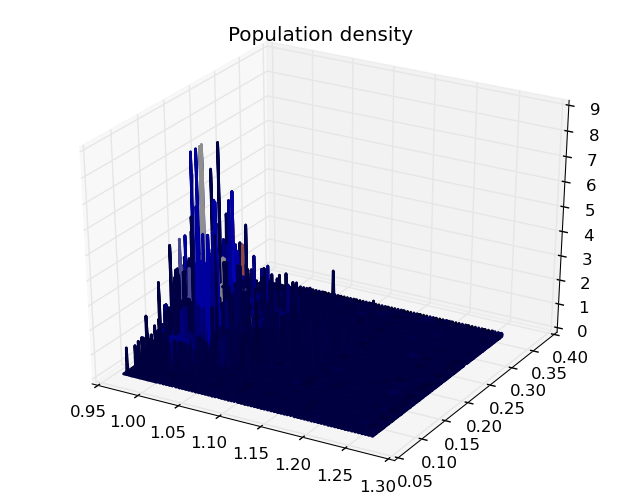

PyObject <matplotlib.text.Text object at 0x7f76c99fdb90>

In [43]:
surf(y,x,z, facecolors=get_cmap("seismic").o(z/maximum(z)), linewidth=2)
title("Population density")
    

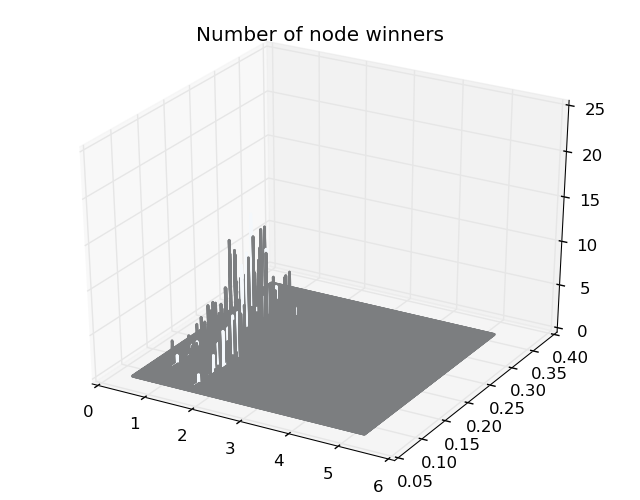

PyObject <matplotlib.text.Text object at 0x7f76d36472d0>

In [44]:
surf(y2,x2,z2, facecolors=get_cmap("Blues").o(z2/maximum(z2)), linewidth=2)
title("Number of node winners")